In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as sc

In [4]:
#sns.pairplot(data=df, hue = 'class')
df = pd.read_excel('Automated Point Management System in FAST Karachi.xlsx')
df.head()

,Timestamp,Email Address,Position,Point Convenience,Online Point System Need,Routes Info Need,Vehicle Info Need,Driver Info Need,GPS Importance,Fee Info,Current System Satisfaction,Online Registration Need,E-Billing Need,Intelligent System Need,Points Safety
0,2021-05-10 17:52:13.868,k180399@nu.edu.pk,Undergraduate,Reasonable,Agree,2,2,3,4,2,Dissatisfied,Yes,Yes,Yes,2
1,2021-05-10 17:59:24.732,k180307@nu.edu.pk,Undergraduate,Easy,Disagree,3,3,3,1,1,Dissatisfied,Yes,Yes,Yes,3
2,2021-05-10 17:59:34.013,k180331@nu.edu.pk,Undergraduate,Reasonable,Agree,1,2,3,1,1,Dissatisfied,Yes,Yes,Yes,3
3,2021-05-10 18:07:02.936,k181128@nu.edu.pk,Undergraduate,Difficult,Agree,4,4,4,4,3,Dissatisfied,Yes,Yes,Yes,4
4,2021-05-10 18:23:43.110,k191050@nu.edu.pk,Undergraduate,Difficult,Agree,1,1,1,1,1,Satisfied,Maybe,Maybe,Yes,2


In [5]:
df.drop(columns=['Timestamp','Email Address','Position','Fee Info'],inplace=True,axis=1)
df.head()

,Point Convenience,Online Point System Need,Routes Info Need,Vehicle Info Need,Driver Info Need,GPS Importance,Current System Satisfaction,Online Registration Need,E-Billing Need,Intelligent System Need,Points Safety
0,Reasonable,Agree,2,2,3,4,Dissatisfied,Yes,Yes,Yes,2
1,Easy,Disagree,3,3,3,1,Dissatisfied,Yes,Yes,Yes,3
2,Reasonable,Agree,1,2,3,1,Dissatisfied,Yes,Yes,Yes,3
3,Difficult,Agree,4,4,4,4,Dissatisfied,Yes,Yes,Yes,4
4,Difficult,Agree,1,1,1,1,Satisfied,Maybe,Maybe,Yes,2


In [6]:
p_con = list(df['Point Convenience'])
on_need = df['Online Point System Need']
route = df['Routes Info Need']
vcl = df['Vehicle Info Need']
drvr = df['Driver Info Need']
gps = df.iloc[:,5]
cs_sats = df.iloc[:,6]
on_reg = df.iloc[:,7]
e_bill = df.iloc[:,8]
int_sys = df.iloc[:,9]
pts_sfty = df.iloc[:,10] 
mode , count = sc.stats.mode(pts_sfty)
str(mode[0])


'2'

In [7]:
cols =  list(df.columns)
data = {}
count=0
smode = ""
y=[]
x=[]
for i in range(len(cols)):
    li=[]
    li = df.iloc[:,i]
    smode,count=sc.stats.mode(li)
    smode = str(smode[0])
    count = int(count[0])
    y.append(count)
    x.append(cols[i]+" "+smode)

    data[cols[i]]=(smode,count)


data


{'Point Convenience': ('Reasonable', 40),
 'Online Point System Need': ('Agree', 60),
 'Routes Info Need': ('1', 31),
 'Vehicle Info Need': ('1', 26),
 'Driver Info Need': ('1', 24),
 'GPS Importance': ('1', 44),
 'Current System Satisfaction': ('Dissatisfied', 34),
 'Online Registration Need': ('Yes', 49),
 'E-Billing Need': ('Yes', 41),
 'Intelligent System Need': ('Yes', 50),
 'Points Safety': ('2', 31)}

<ipython-input-10-35f173b88ad2>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,weight='bold')
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Research Analysis')

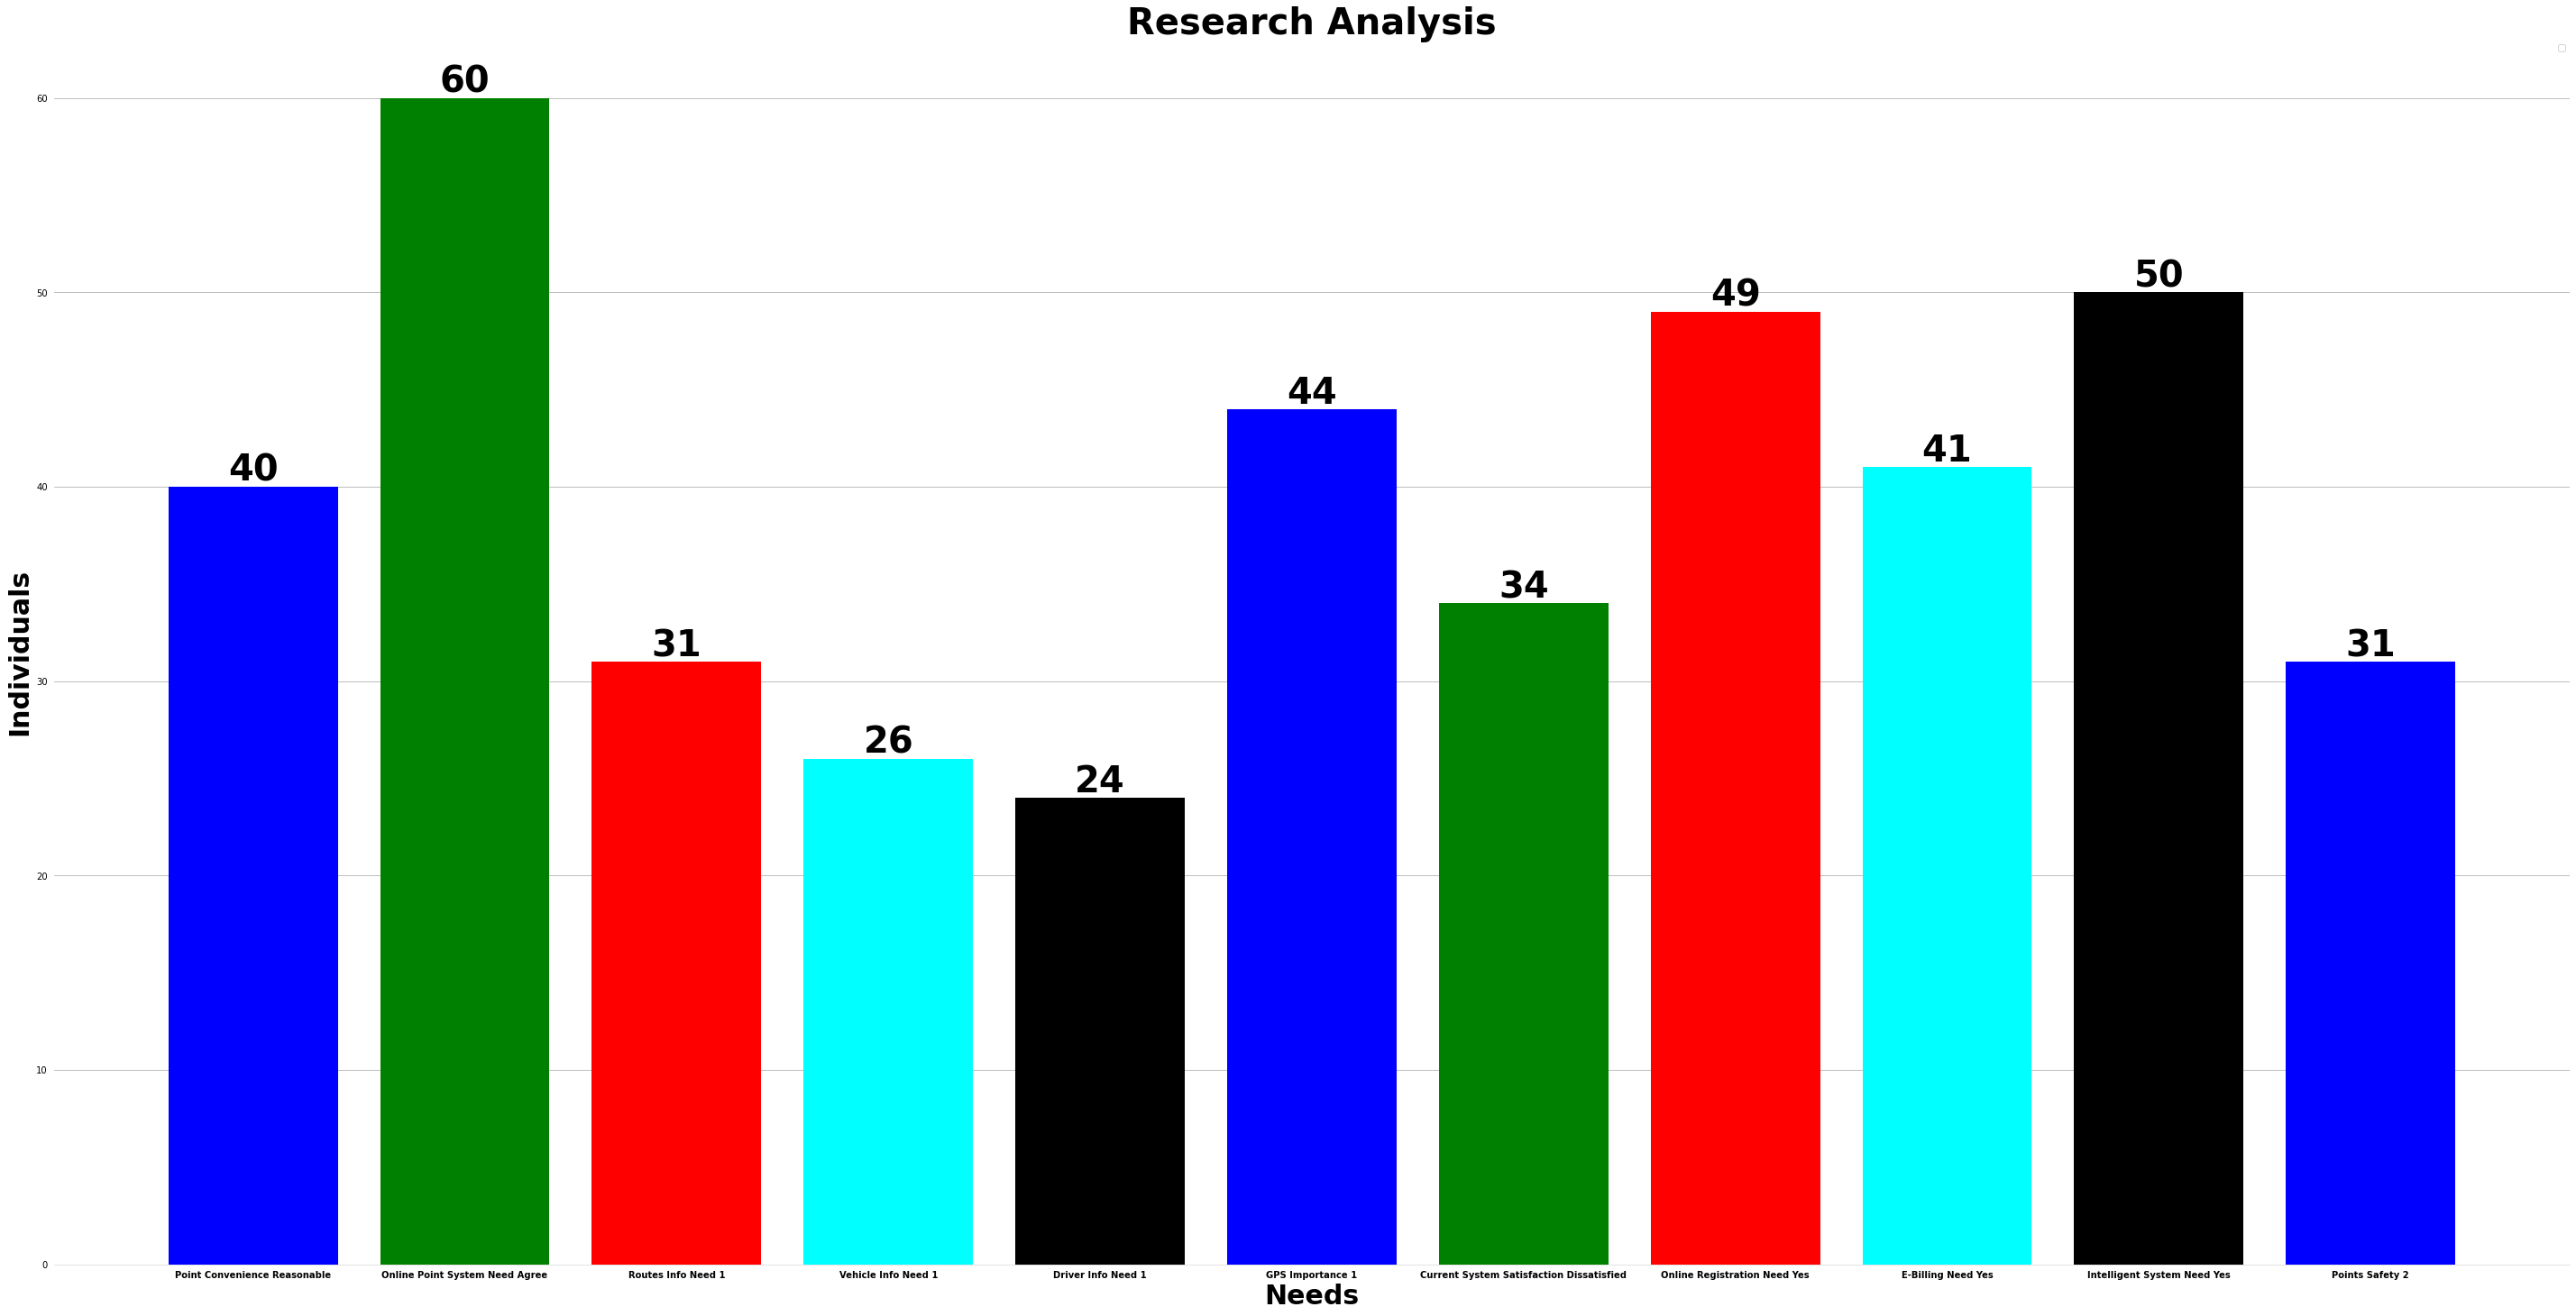

In [10]:
#y=sorted(y)
plt.figure(figsize=(50,25))
ax = plt.subplot()
clrs = ['blue', 'green', 'red', 'cyan','black']
bars = plt.bar(x,y,color=clrs)
ax.set_xticklabels(x,weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plt.legend()
bar_color = 'black'
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold',
      fontsize=40
  )
#ax.set_yticks(y)
#ax.set_yticklabels(y,weight='bold',fontsize=40)
bar_color = bars[0].get_facecolor()
plt.xlabel("Needs",weight='bold',fontsize=30)
plt.ylabel("Individuals",weight='bold',fontsize=30)
plt.title("Research Analysis",weight='bold',fontsize=40)
